#### Input
The input csv file is a concatenation of the `TEST-*_stats.csv` file output from `checker.py` (i.e., the last steps in `04_check_variants.sh`), which provides true positive, false positive, false negative, precision, and recall values after variant-calling.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [150]:
stats = pd.read_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/output/checked/20210525_all_stats_cov3.csv', header=None)

In [151]:
stats.rename(columns={0: 'file_prefix', 1: 'true_pos', 2: 'false_pos', 3: 'false_neg', 4: 'precision', 5: 'recall'}, inplace=True)

In [152]:
stats.loc[stats['recall'] == '.' , 'recall'] = np.nan
stats.loc[stats['precision'] == '.' , 'precision'] = np.nan
stats['recall'] = pd.to_numeric(stats['recall'])
stats['precision'] = pd.to_numeric(stats['precision'])

In [153]:
stats['true_pos'] = pd.to_numeric(stats['true_pos'])
stats['false_pos'] = pd.to_numeric(stats['false_pos'])
stats['false_neg'] = pd.to_numeric(stats['false_neg'])

In [129]:
num_snp = {'TEST-H37Rv20snps': 20, 'TEST-H37Rv200snps': 200, 'TEST-H37Rv2000snps': 2000, 'TEST-H37Rv20003snps': 20003, 'TEST-MTBREF': 0, 
            'TEST-MTBVAR1': 1048, 'TEST-MTBVAR2': 3277, 'TEST-MTBVAR3': 11, 'TEST-MTBVAR4': 149, 'TEST-MTBVAR5': 1480, 'TEST-MTBVAR6': 16468}
num_indel = {'TEST-H37Rv20snps': 0, 'TEST-H37Rv200snps': 0, 'TEST-H37Rv2000snps': 0, 'TEST-H37Rv20003snps': 0, 'TEST-MTBREF': 0, 
             'TEST-MTBVAR1': 3317, 'TEST-MTBVAR2': 1120, 'TEST-MTBVAR3': 9, 'TEST-MTBVAR4': 51, 'TEST-MTBVAR5': 524, 'TEST-MTBVAR6': 5472,
             'TEST-H37Rv10-3indels': 4294, 'TEST-H37Rv10-4indels': 439, 'TEST-H37Rv10-5indels': 44, 'TEST-H37Rv10-6indels': 4}

In [154]:
stats['dataset'] = [name.split('_')[0] for name in stats['file_prefix']]
stats['tool'] = [name.split('_')[-2] for name in stats['file_prefix']]
stats.loc[stats['tool'] == 'normalized', 'tool'] = [name.split('_')[-3].split('-')[0] for name in stats.loc[stats['tool'] == 'normalized',:]['file_prefix']]
stats['num_snp'] = [int(num_snp[ds]) for ds in stats['dataset']]
stats['num_indel'] = [int(num_indel[ds]) for ds in stats['dataset']]
stats['total_mutations'] = stats['num_snp'] + stats['num_indel']
stats['low_cov_mutations_filtered'] = stats['total_mutations'] - stats['true_pos'] - stats['false_neg']

In [155]:
stats['filtered_total_mutations'] = stats['total_mutations'] - stats['low_cov_mutations_filtered']

In [79]:
stats['snp_density'] = stats['num_snp'] / 4411532

In [80]:
stats['indel_snp_ratio'] = round(stats['num_indel']/stats['num_snp'], 2)

In [93]:
# remove duplicate data
stats_noHC = stats[stats['tool'] != 'HaplotypeCaller']

In [113]:
stats_noHC

,file_prefix,true_pos,false_pos,false_neg,precision,recall,dataset,tool,num_snp,num_indel,total_mutations,low_cov_mutations_filtered,filtered_total_mutations,snp_density,indel_snp_ratio
0,TEST-H37Rv20003snps_discosnp-edit_normalized_P...,19314,52,472,0.997315,0.976145,TEST-H37Rv20003snps,discosnp,20003,0,20003,217,19786,0.004534,0.00
1,TEST-H37Rv2000snps_discosnp-edit_normalized_PA...,1937,9,40,0.995375,0.979767,TEST-H37Rv2000snps,discosnp,2000,0,2000,23,1977,0.000453,0.00
2,TEST-H37Rv200snps_discosnp-edit_normalized_PAS...,192,4,7,0.979592,0.964824,TEST-H37Rv200snps,discosnp,200,0,200,1,199,0.000045,0.00
3,TEST-H37Rv20snps_discosnp-edit_normalized_PASS...,18,3,2,0.857143,0.900000,TEST-H37Rv20snps,discosnp,20,0,20,0,20,0.000005,0.00
4,TEST-MTBVAR1_discosnp-edit_normalized_PASSsorted,2160,1047,956,0.673527,0.693196,TEST-MTBVAR1,discosnp,1048,3317,4365,1249,3116,0.000238,3.17
5,TEST-MTBVAR2_discosnp-edit_normalized_PASSsorted,3519,411,399,0.895420,0.898162,TEST-MTBVAR2,discosnp,3277,1120,4397,479,3918,0.000743,0.34
6,TEST-MTBVAR3_discosnp-edit_normalized_PASSsorted,15,5,2,0.750000,0.882353,TEST-MTBVAR3,discosnp,11,9,20,3,17,0.000002,0.82
7,TEST-MTBVAR4_discosnp-edit_normalized_PASSsorted,165,20,14,0.891892,0.921788,TEST-MTBVAR4,discosnp,149,51,200,21,179,0.000034,0.34
8,TEST-MTBVAR5_discosnp-edit_normalized_PASSsorted,1633,193,150,0.894304,0.915872,TEST-MTBVAR5,discosnp,1480,524,2004,221,1783,0.000335,0.35
9,TEST-MTBVAR6_discosnp-edit_normalized_PASSsorted,17963,1912,1762,0.903799,0.910672,TEST-MTBVAR6,discosnp,16468,5472,21940,2215,19725,0.003733,0.33


In [102]:
stats_SNPonly = stats_noHC[stats['num_indel'] == 0]

<ipython-input-102-bd91b53e1499>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stats_SNPonly = stats_noHC[stats['num_indel'] == 0]


In [105]:
stats_SNPonly

,file_prefix,true_pos,false_pos,false_neg,precision,recall,dataset,tool,num_snp,num_indel,total_mutations,low_cov_mutations_filtered,filtered_total_mutations,snp_density,indel_snp_ratio
0,TEST-H37Rv20003snps_discosnp-edit_normalized_P...,19314,52,472,0.997315,0.976145,TEST-H37Rv20003snps,discosnp,20003,0,20003,217,19786,0.004534,0.0
1,TEST-H37Rv2000snps_discosnp-edit_normalized_PA...,1937,9,40,0.995375,0.979767,TEST-H37Rv2000snps,discosnp,2000,0,2000,23,1977,0.000453,0.0
2,TEST-H37Rv200snps_discosnp-edit_normalized_PAS...,192,4,7,0.979592,0.964824,TEST-H37Rv200snps,discosnp,200,0,200,1,199,0.000045,0.0
3,TEST-H37Rv20snps_discosnp-edit_normalized_PASS...,18,3,2,0.857143,0.900000,TEST-H37Rv20snps,discosnp,20,0,20,0,20,0.000005,0.0
10,TEST-H37Rv20003snps_mq10_bcftools_normalized,19786,23,0,0.998839,1.000000,TEST-H37Rv20003snps,bcftools,20003,0,20003,217,19786,0.004534,0.0
11,TEST-H37Rv2000snps_mq10_bcftools_normalized,1977,6,0,0.996974,1.000000,TEST-H37Rv2000snps,bcftools,2000,0,2000,23,1977,0.000453,0.0
12,TEST-H37Rv200snps_mq10_bcftools_normalized,199,0,0,1.000000,1.000000,TEST-H37Rv200snps,bcftools,200,0,200,1,199,0.000045,0.0
13,TEST-H37Rv20snps_mq10_bcftools_normalized,20,0,0,1.000000,1.000000,TEST-H37Rv20snps,bcftools,20,0,20,0,20,0.000005,0.0
20,TEST-H37Rv20003snps_mq10_deepvariant_normalize...,19786,21,0,0.998940,1.000000,TEST-H37Rv20003snps,deepvariant,20003,0,20003,217,19786,0.004534,0.0
21,TEST-H37Rv2000snps_mq10_deepvariant_normalized...,1977,4,0,0.997981,1.000000,TEST-H37Rv2000snps,deepvariant,2000,0,2000,23,1977,0.000453,0.0


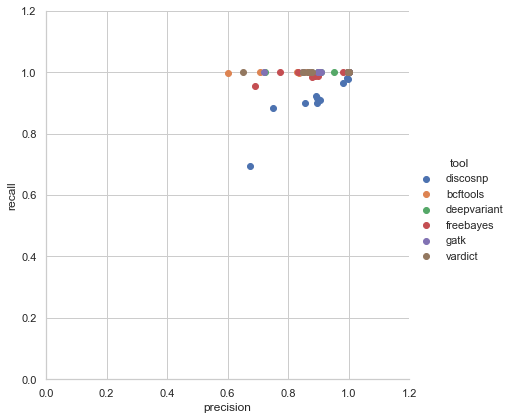

In [112]:
# https://stackoverflow.com/questions/14885895/color-by-column-values-in-matplotlib
seaborn.set(style='whitegrid')
fg = seaborn.FacetGrid(data=stats_noHC, hue='tool', height=6, aspect=1, xlim=(0,1.2), ylim=(0,1.2))
fg.map(plt.scatter, 'precision', 'recall').add_legend()

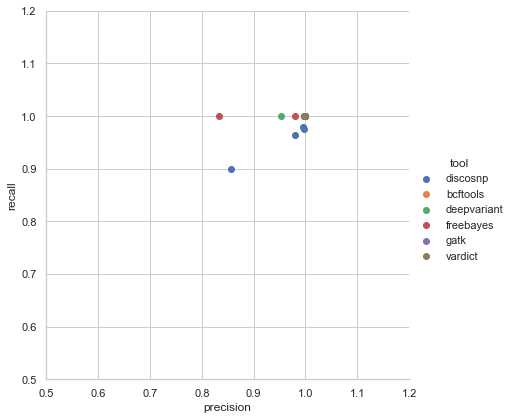

In [104]:
seaborn.set(style='whitegrid')
fg = seaborn.FacetGrid(data=stats_SNPonly, hue='tool', height=6, aspect=1, xlim=(0.5,1.2), ylim=(0.5,1.2))
fg.map(plt.scatter, 'precision', 'recall').add_legend()

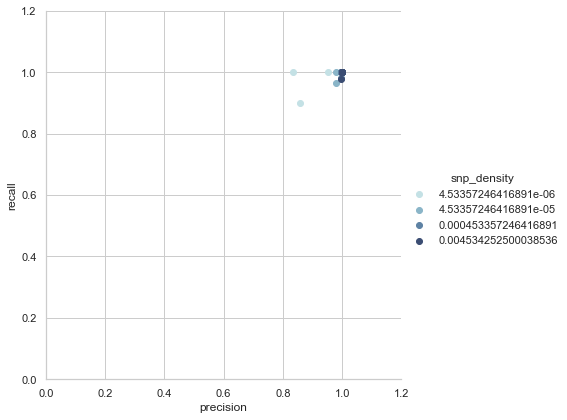

In [103]:
seaborn.set(style='whitegrid')
fg = seaborn.FacetGrid(data=stats_SNPonly, hue='snp_density', palette='ch:r=-.2,d=.3', height=6, aspect=1, xlim=(0,1.2), ylim=(0,1.2))
fg.map(plt.scatter, 'precision', 'recall').add_legend()

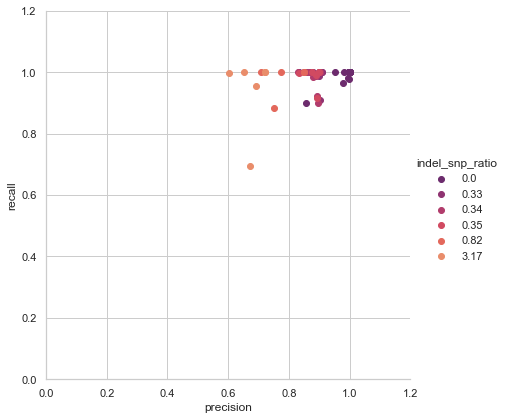

In [111]:
seaborn.set(style='whitegrid')
fg = seaborn.FacetGrid(data=stats_noHC, hue='indel_snp_ratio', palette='flare_r', height=6, aspect=1, xlim=(0,1.2), ylim=(0,1.2))
fg.map(plt.scatter, 'precision', 'recall').add_legend()

In [215]:
indelstats = pd.read_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/output/checked/20210527_all_indels.csv', header=None)

In [216]:
indelstats.rename(columns={0: 'file_prefix', 1: 'true_pos', 2: 'false_pos', 3: 'false_neg', 4: 'precision', 5: 'recall'}, inplace=True)
indelstats.loc[indelstats['recall'] == '.' , 'recall'] = np.nan
indelstats.loc[indelstats['precision'] == '.' , 'precision'] = np.nan
indelstats['recall'] = pd.to_numeric(indelstats['recall'])
indelstats['precision'] = pd.to_numeric(indelstats['precision'])
indelstats['true_pos'] = pd.to_numeric(indelstats['true_pos'])
indelstats['false_pos'] = pd.to_numeric(indelstats['false_pos'])
indelstats['false_neg'] = pd.to_numeric(indelstats['false_neg'])

In [217]:
indelstats['dataset'] = [name.split('_')[0] for name in indelstats['file_prefix']]
indelstats['tool'] = [name.split('_')[-2] for name in indelstats['file_prefix']]
indelstats.loc[indelstats['tool'] == 'normalized', 'tool'] = [name.split('_')[-3].split('-')[0] for name in indelstats.loc[indelstats['tool'] == 'normalized',:]['file_prefix']]
indelstats['num_indel'] = [int(num_indel[ds]) for ds in indelstats['dataset']]
indelstats['low_cov_mutations_filtered'] = indelstats['num_indel'] - indelstats['true_pos'] - indelstats['false_neg']
indelstats['filtered_total_mutations'] = indelstats['num_indel'] - indelstats['low_cov_mutations_filtered']
indelstats['indel_density'] = indelstats['num_indel'] / 4411532

In [218]:
indelstats

,file_prefix,true_pos,false_pos,false_neg,precision,recall,dataset,tool,num_indel,low_cov_mutations_filtered,filtered_total_mutations,indel_density
0,TEST-H37Rv10-3indels_mq10_bcftools_normalized,2654,2613,1,0.503892,0.999623,TEST-H37Rv10-3indels,bcftools,4294,1639,2655,9.733580e-04
1,TEST-H37Rv10-4indels_mq10_bcftools_normalized,296,240,0,0.552239,1.000000,TEST-H37Rv10-4indels,bcftools,439,143,296,9.951192e-05
2,TEST-H37Rv10-5indels_mq10_bcftools_normalized,33,18,0,0.647059,1.000000,TEST-H37Rv10-5indels,bcftools,44,11,33,9.973859e-06
3,TEST-H37Rv10-6indels_mq10_bcftools_normalized,2,2,0,0.500000,1.000000,TEST-H37Rv10-6indels,bcftools,4,2,2,9.067145e-07
4,TEST-H37Rv10-3indels_mq10_freebayes_normalized,2603,1649,52,0.612183,0.980414,TEST-H37Rv10-3indels,freebayes,4294,1639,2655,9.733580e-04
5,TEST-H37Rv10-4indels_mq10_freebayes_normalized,292,149,4,0.662132,0.986486,TEST-H37Rv10-4indels,freebayes,439,143,296,9.951192e-05
6,TEST-H37Rv10-5indels_mq10_freebayes_normalized,32,14,1,0.695652,0.969697,TEST-H37Rv10-5indels,freebayes,44,11,33,9.973859e-06
7,TEST-H37Rv10-6indels_mq10_freebayes_normalized,2,7,0,0.222222,1.000000,TEST-H37Rv10-6indels,freebayes,4,2,2,9.067145e-07
8,TEST-H37Rv10-3indels_mq10_gatk_normalized,2655,1599,0,0.624118,1.000000,TEST-H37Rv10-3indels,gatk,4294,1639,2655,9.733580e-04
9,TEST-H37Rv10-4indels_mq10_gatk_normalized,296,142,0,0.675799,1.000000,TEST-H37Rv10-4indels,gatk,439,143,296,9.951192e-05


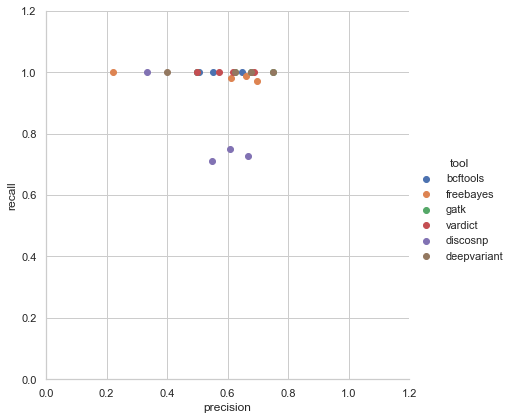

In [219]:
seaborn.set(style='whitegrid')
fg = seaborn.FacetGrid(data=indelstats, hue='tool', height=6, aspect=1, xlim=(0,1.2), ylim=(0,1.2))
fg.map(plt.scatter, 'precision', 'recall').add_legend()

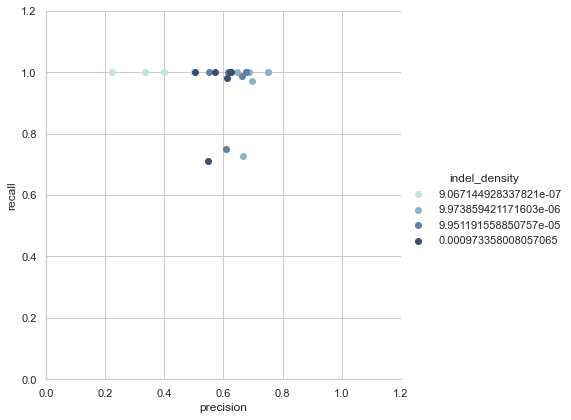

In [220]:
seaborn.set(style='whitegrid')
fg = seaborn.FacetGrid(data=indelstats, hue='indel_density', palette='ch:r=-.2,d=.3', height=6, aspect=1, xlim=(0,1.2), ylim=(0,1.2))
fg.map(plt.scatter, 'precision', 'recall').add_legend()

In [221]:
snps_vs_indels = pd.concat([stats_SNPonly, indelstats])

In [222]:
snps_vs_indels['type'] = ''
snps_vs_indels.loc[snps_vs_indels['num_indel'] == 0, 'type'] = 'SNP'
snps_vs_indels.loc[snps_vs_indels['num_indel'] > 0, 'type'] = 'indel'

In [274]:
snps_vs_indels['mutation_density'] = np.nan
snps_vs_indels.loc[snps_vs_indels['type'] == 'SNP', 'mutation_density'] = [dens for dens in snps_vs_indels.loc[snps_vs_indels['type'] == 'SNP',:]['snp_density']]
snps_vs_indels.loc[snps_vs_indels['type'] == 'indel', 'mutation_density'] = [denct for denct in snps_vs_indels.loc[snps_vs_indels['type'] == 'indel', :]['indel_density']]

In [275]:
snps_vs_indels

,file_prefix,true_pos,false_pos,false_neg,precision,recall,dataset,tool,num_snp,num_indel,total_mutations,low_cov_mutations_filtered,filtered_total_mutations,snp_density,indel_snp_ratio,indel_density,type,mutation_density
0,TEST-H37Rv20003snps_discosnp-edit_normalized_P...,19314,52,472,0.997315,0.976145,TEST-H37Rv20003snps,discosnp,20003.0,0,20003.0,217,19786,0.004534,0.0,NaN,SNP,4.534253e-03
1,TEST-H37Rv2000snps_discosnp-edit_normalized_PA...,1937,9,40,0.995375,0.979767,TEST-H37Rv2000snps,discosnp,2000.0,0,2000.0,23,1977,0.000453,0.0,NaN,SNP,4.533572e-04
2,TEST-H37Rv200snps_discosnp-edit_normalized_PAS...,192,4,7,0.979592,0.964824,TEST-H37Rv200snps,discosnp,200.0,0,200.0,1,199,0.000045,0.0,NaN,SNP,4.533572e-05
3,TEST-H37Rv20snps_discosnp-edit_normalized_PASS...,18,3,2,0.857143,0.900000,TEST-H37Rv20snps,discosnp,20.0,0,20.0,0,20,0.000005,0.0,NaN,SNP,4.533572e-06
10,TEST-H37Rv20003snps_mq10_bcftools_normalized,19786,23,0,0.998839,1.000000,TEST-H37Rv20003snps,bcftools,20003.0,0,20003.0,217,19786,0.004534,0.0,NaN,SNP,4.534253e-03
11,TEST-H37Rv2000snps_mq10_bcftools_normalized,1977,6,0,0.996974,1.000000,TEST-H37Rv2000snps,bcftools,2000.0,0,2000.0,23,1977,0.000453,0.0,NaN,SNP,4.533572e-04
12,TEST-H37Rv200snps_mq10_bcftools_normalized,199,0,0,1.000000,1.000000,TEST-H37Rv200snps,bcftools,200.0,0,200.0,1,199,0.000045,0.0,NaN,SNP,4.533572e-05
13,TEST-H37Rv20snps_mq10_bcftools_normalized,20,0,0,1.000000,1.000000,TEST-H37Rv20snps,bcftools,20.0,0,20.0,0,20,0.000005,0.0,NaN,SNP,4.533572e-06
20,TEST-H37Rv20003snps_mq10_deepvariant_normalize...,19786,21,0,0.998940,1.000000,TEST-H37Rv20003snps,deepvariant,20003.0,0,20003.0,217,19786,0.004534,0.0,NaN,SNP,4.534253e-03
21,TEST-H37Rv2000snps_mq10_deepvariant_normalized...,1977,4,0,0.997981,1.000000,TEST-H37Rv2000snps,deepvariant,2000.0,0,2000.0,23,1977,0.000453,0.0,NaN,SNP,4.533572e-04


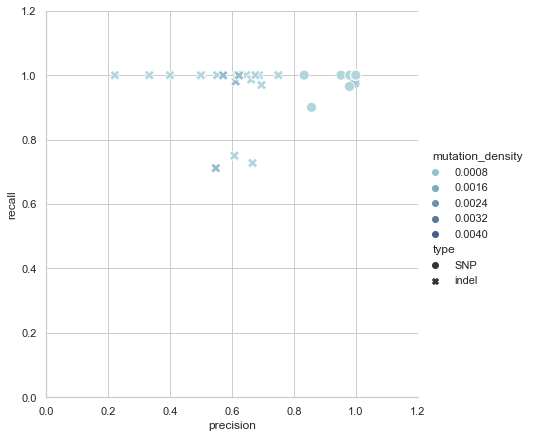

In [276]:
fg = seaborn.relplot(data=snps_vs_indels, x='precision', y='recall', hue='mutation_density', palette='ch:r=-.2,d=.3,l=.8', style='type', height=6, aspect=1, s=100)
fg.set(xlim=(0, 1.2), ylim=(0, 1.2))